# hierarchical clustering from scratch!
Writing your own hierarchical clustering algorithm will reinforce your understanding of how it works, improve your Python skills, and it's not as hard as you think.
## Refresher on how (agglomerative) hierarchical clustering works
Start off by treating each point as its own cluster.  The two closest points get joined into a cluster.  Repeat, but now a "point" can be a point or a cluster.
## Initialize the clusters
We will start out with two big clusters, as in the k-means-from-scratch exercise.

In [16]:
import random
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.spatial import distance
%matplotlib inline

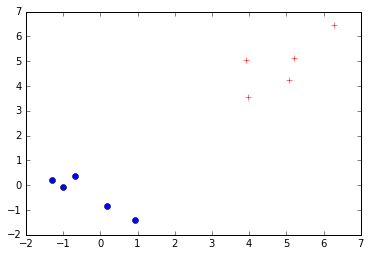

In [17]:
random.seed(0)
# Create points
sizeOfClusters = 5

cluster1 = pd.DataFrame(columns=["x","y","cluster","color","centroid"])
for i in range(sizeOfClusters):
    # This will make a cluster of points centered around (0,0), with sd = 1
    x = random.gauss(0,1) # gauss(mean, sd) (guassian distribution <=> normal distribution)
    y = random.gauss(0,1)
    cluster1.loc[i] = [x,y,1,'bo',np.array([x,y])]

random.seed(1)
cluster2 = pd.DataFrame(columns=["x","y","cluster","color","centroid"])
for i in range(sizeOfClusters):
    # This will make a cluster of points centered around (5,5), with sd = 1
    x = random.gauss(5,1)
    y = random.gauss(5,1)
    cluster2.loc[i] = [x,y,2,'r+',np.array([x,y])]

plt.plot(cluster1.x,cluster1.y,'bo')
plt.plot(cluster2.x,cluster2.y,'r+')
plt.show()

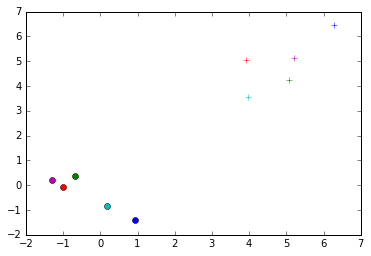

In [18]:
# Now we combine the datasets, and you have to hierarchically cluster them.
clusterF = pd.concat([cluster1,cluster2]).reset_index(drop=True)
clusterF.cluster = range(len(clusterF)) # Each starts out as its own cluster.
# We give them all distinct colors so we can distinguish between the clusters.
colors = ['bo', 'go', 'ro', 'co', 'mo', 'b+', 'g+', 'r+', 'c+', 'm+']
clusterF["color"] = colors
for i in range(len(clusterF)):
    plt.plot(clusterF.loc[i,"x"],clusterF.loc[i,"y"],clusterF.loc[i,"color"])
plt.show()

In [19]:
clusterF

,x,y,cluster,color,centroid
0,0.941715,-1.396578,0,bo,"[0.941715404681, -1.3965781047]"
1,-0.679714,0.370504,1,go,"[-0.679714448078, 0.370503567461]"
2,-1.016349,-0.072120,2,ro,"[-1.01634889419, -0.0721200227851]"
3,0.179196,-0.831099,3,co,"[0.179196487275, -0.831099215271]"
4,-1.309037,0.193888,4,mo,"[-1.30903736446, 0.193887741249]"
5,6.288185,6.449446,5,b+,"[6.28818475316, 6.4494456087]"
6,5.066336,4.235456,6,g+,"[5.06633580894, 4.23545634903]"
7,3.907827,5.031335,7,r+,"[3.9078267849, 5.03133451683]"
8,3.977897,3.563171,8,c+,"[3.97789682999, 3.5631705549]"
9,5.199312,5.133375,9,m+,"[5.19931197648, 5.13337460466]"


## Let's write some pseudo-code
#### For an extra challenge to yourself, don't read the pseudo-code; just go off of your understanding of agglomerative hierarchical clustering.
1. Begin with each point being its own cluster.
2. Calculate the distances between all clusters (remember, a cluster can be one or more points, but initially, will be only one).
3. Merge the two closest clusters. (Update the cluster column and the centroids for the newly merged clusters; also, update the color column, for the sake of the plot.)
4. Repeat steps 2 and 3 until you have one big cluster.

Note: we will use centroid linkage clustering.  That is to say, the distance between cluster `a` and cluster `b` will be defined as the distance between the centroids of the points in `a` and the points in `b` (the centroid of a set of points is just the average of the points).

## Now, let's write some real code!

In [20]:
def notOneCluster(clusterF):
    clusterRow0 = clusterF.loc[0,"cluster"]
    for i in range(len(clusterF)):
        if (clusterF.loc[i,"cluster"] != clusterRow0):
            return True
    return False

In [21]:
from sklearn.metrics.pairwise import pairwise_distances


In [42]:
while (notOneCluster(clusterF)):
    # Plot within the loop so you can see the progress
    print(clusterF)
    iCluster = -1
    jCluster = -1
    iMin = -1
    minimumDistance = 1000
    for i in range(len(clusterF)):
        for j in range(len(clusterF)):
            if (clusterF.loc[i,"cluster"] == clusterF.loc[j,"cluster"]):
                continue
            distanceIJ = distance.euclidean(clusterF.loc[i,"centroid"],clusterF.loc[j,"centroid"])
            if ( distanceIJ < minimumDistance):
                minimumDistance = distanceIJ
                iCluster = clusterF.loc[i,"cluster"]
                jCluster = clusterF.loc[j,"cluster"]
                iMin = i
    # Merge the minimum distance clusters: jCluster's become iCluster's.
    for i in range(len(clusterF)):
        if (clusterF.loc[i,"cluster"] == jCluster):
            clusterF.loc[i,"cluster"] = iCluster
            clusterF.loc[i,"color"] = clusterF.loc[iMin,"color"]

    # Recalculate the centroids for the newly merged clusters
    newCentroid = np.array([0.0,0.0])
    count = 0
    for i in range(len(clusterF)):
        if (clusterF.loc[i,"cluster"] == jCluster):
            newCentroid += np.array([clusterF.loc[i,"x"], clusterF.loc[i,"y"]])
            count += 1
    newCentroid /= count
    for i in range(len(clusterF)):
        if(clusterF.loc[i,"cluster"] == jCluster):
            clusterF.set_values(i, "centroid",newCentroid)

          x         y  cluster color                            centroid
0  0.941715 -1.396578        0    bo     [0.941715404681, -1.3965781047]
1 -0.679714  0.370504        1    go   [-0.679714448078, 0.370503567461]
2 -1.016349 -0.072120        4    mo  [-1.01634889419, -0.0721200227851]
3  0.179196 -0.831099        3    co   [0.179196487275, -0.831099215271]
4 -1.309037  0.193888        4    mo    [-1.30903736446, 0.193887741249]
5  6.288185  6.449446        5    b+       [6.28818475316, 6.4494456087]
6  5.066336  4.235456        6    g+      [5.06633580894, 4.23545634903]
7  3.907827  5.031335        7    r+       [3.9078267849, 5.03133451683]
8  3.977897  3.563171        8    c+       [3.97789682999, 3.5631705549]
9  5.199312  5.133375        9    m+      [5.19931197648, 5.13337460466]
          x         y  cluster color                            centroid
0  0.941715 -1.396578        0    bo     [0.941715404681, -1.3965781047]
1 -0.679714  0.370504        1    go   [-0.67971444